# GIR2019 Maps Paper, Figures

In [1]:
# %matplotlib notebook 

In [2]:
import cartopy
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import itertools
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd

## Read the Gazetteer (gb1900_gazetteer_complete_july_2018.csv)

In [3]:
with open("./gb1900_gazetteer_complete_july_2018.csv", encoding='UTF-16') as f:
    df = pd.read_csv(f)

/Users/khosseini/anaconda3/envs/py37torch/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,pin_id,final_text,nation,local_authority,parish,osgb_east,osgb_north,latitude,longitude,notes
0,52b34d8b695fe90005004e1e,F. P.,Wales,Powys,Llansilin,320836.712742,327820.182715,52.842050,-3.176744,NaN
1,5800a6b92c66dcab3d061796,Parly. & Munl Boro. By.,England,City of London,NaN,531794.825962,180705.741898,51.509918,-0.102246,NaN
2,5800a6782c66dcab3d061786,S. Ps.,England,City of London,NaN,531736.217116,180725.027730,51.510105,-0.103083,NaN
3,57f684f42c66dcab3d01c0dd,Southwark Bridge Stairs,England,City of London,NaN,532199.584123,180696.934434,51.509744,-0.096420,NaN
4,57f685002c66dcab3d01c0e9,St. Paul's Pier,England,City of London,NaN,531987.486097,180745.664556,51.510232,-0.099456,NaN


## Read Wikipedia Gazetteers

In [5]:
wiki_all = pd.read_pickle("./pickle_files/all_wikigazetteer.pkl")
wiki_brit = pd.read_pickle("./pickle_files/brit_wikigazetteer.pkl")
gold_standard = pd.read_pickle("./pickle_files/gold_standard.pkl")

In [6]:
wiki_all.head()

,wiki_id,wiki_title,wiki_lat,wiki_lon
0,1,Alabama,32.7000,-86.70000
1,2,Algeria,28.0000,2.00000
2,3,Andorra,42.5000,1.51667
3,4,Alaska,64.0000,-150.00000
4,5,American_National_Standards_Institute,38.9039,-77.04310


## Create list of lats/lons out of GB1900, Wikipedia Gazetteer

In [7]:
# GB1900
lats2plot_gb1900 = []
lons2plot_gb1900 = []

lats2plot_gb1900.append(df["latitude"].tolist())
lons2plot_gb1900.append(df["longitude"].tolist())

In [8]:
# Wikipedia (all)
lats2plot_all_gazetteer = []
lons2plot_all_gazetteer = []

lats2plot_all_gazetteer.append(wiki_all["wiki_lat"].tolist())
lons2plot_all_gazetteer.append(wiki_all["wiki_lon"].tolist())

In [9]:
# Wikipedia (Britain)
lats2plot_brit_gazetteer = []
lons2plot_brit_gazetteer = []

lats2plot_brit_gazetteer.append(wiki_brit["wiki_lat"].tolist())
lons2plot_brit_gazetteer.append(wiki_brit["wiki_lon"].tolist())

In [10]:
# Gold Standards (manually annotated)
lats2plot_gold = []
lons2plot_gold = []

lats2plot_gold.append(gold_standard["wiki_lat"].tolist())
lons2plot_gold.append(gold_standard["wiki_lon"].tolist())

In [11]:
print("GB1900:                {}".format(len(lats2plot_gb1900[0])))
print("Wiki Gazetteer:        {}".format(len(lats2plot_all_gazetteer[0])))
print("Wiki Gazetteer (Brit): {}".format(len(lats2plot_brit_gazetteer[0])))
print("Gold standards:        {}".format(len(lats2plot_gold[0])))

GB1900:                2552459
Wiki Gazetteer:        1461606
Wiki Gazetteer (Brit): 195805
Gold standards:        950


## Figure: Gold Standard, UK/Europe

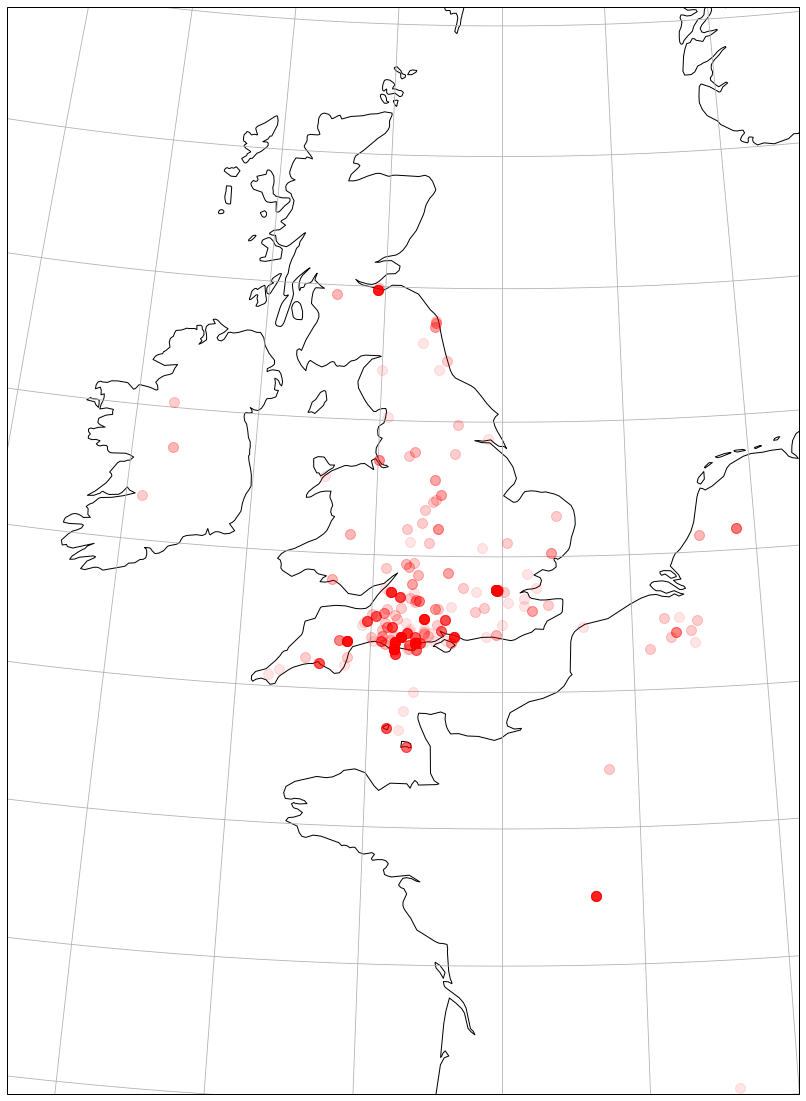

In [12]:
list_colors = ["r", "b", "g", "c", "m"]
map_extent = [-10, 6, 44, 60]

myfig, myaxes = plt.subplots(figsize=(20, 20))

# Projection
ax = plt.axes(projection=ccrs.Orthographic(0, 40))
"""
# Other examples for Projection
ax = plt.axes(projection=ccrs.Robinson(0))
ax = plt.axes(projection=ccrs.EuroPP())
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=0.0, 
                                                  central_latitude=50.0, 
                                                  satellite_height=500000))
"""

igrp = 0
ax.plot(np.array(lons2plot_gold[igrp]), 
        np.array(lats2plot_gold[igrp]),
        marker='o',
        ls=' ',
        color=list_colors[igrp],
        markersize=10,
        alpha=0.1,
        transform=ccrs.PlateCarree()
       )

ax.set_global()
ax.set_extent(map_extent)
ax.gridlines()
ax.coastlines(resolution='50m', linewidth=1.0)

plt.grid()
plt.savefig("gold_standard_UK_Europe.pdf", format="pdf")

## Figure: Gold Standard, Poole

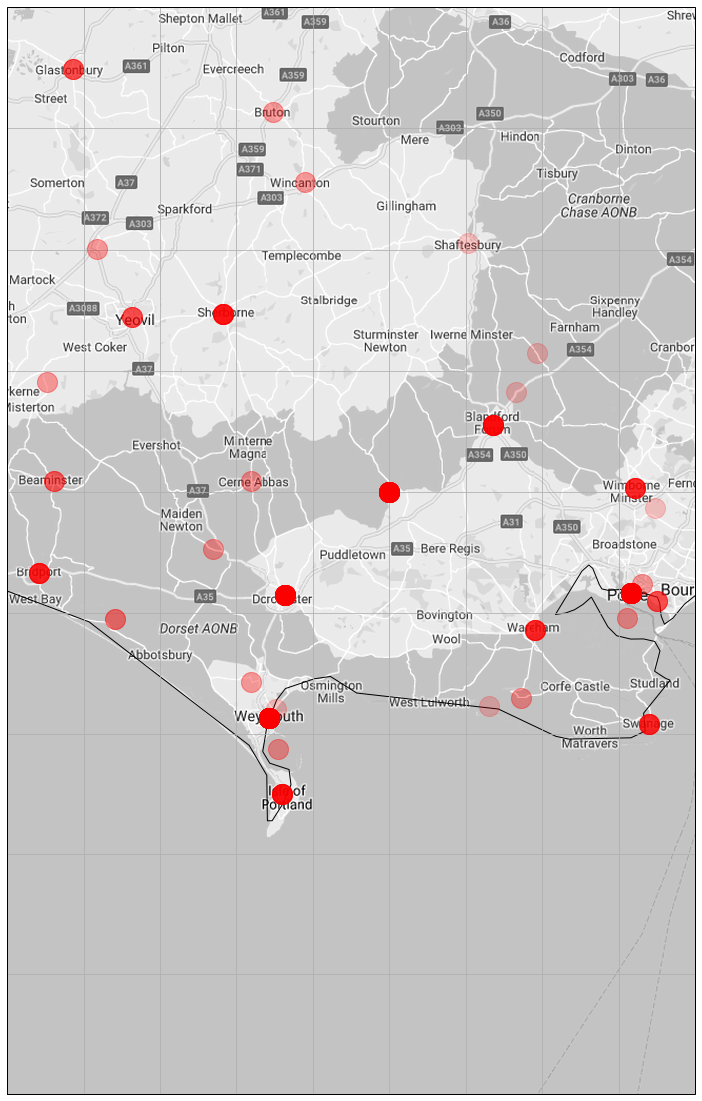

In [14]:
list_colors = ["r", "b", "g", "c", "m"]
map_extent = [-2.8, -1.9, 50.3, 51.2]

request = cimgt.GoogleTiles(desired_tile_form='L', style='street')
#request = cimgt.GoogleTiles()
#request = cimgt.OSM()

fig, ax = plt.subplots(figsize=(20, 20))
ax = plt.axes(projection=request.crs)
ax.set_extent(map_extent)
ax.add_image(request, 10, interpolation='spline36', cmap='gray')

igrp = 0
ax.plot(np.array(lons2plot_gold[igrp]), 
           np.array(lats2plot_gold[igrp]),
            marker='o',
            ls=' ',
            color=list_colors[igrp],
            markersize=20,
            alpha=0.2,
           transform=ccrs.PlateCarree()
          )

ax.set_global()
ax.set_extent(map_extent)
ax.gridlines()
ax.coastlines(resolution='10m', linewidth=1.0)
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m')
ax.add_feature(land_10m, color='gray', zorder=0, edgecolor='black')

plt.grid()
plt.savefig("gold_standard_Poole.pdf", format="pdf")

## Figure: Wikipedia, Globe

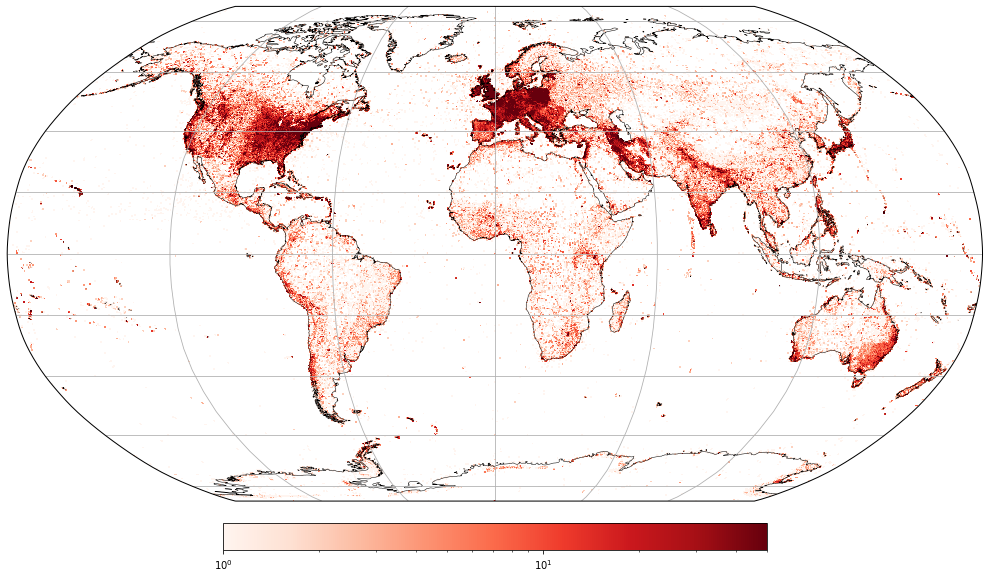

In [15]:
list_colors = ["r", "b", "g", "c", "m"]

myfig, myaxes = plt.subplots(figsize=(20, 10))

# Projection
ax = plt.axes(projection=ccrs.Robinson(0))
"""
# Other examples for Projection
ax = plt.axes(projection=ccrs.Robinson(0))
ax = plt.axes(projection=ccrs.EuroPP())
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=0.0, 
                                                  central_latitude=50.0, 
                                                  satellite_height=500000))
"""

igrp = 0
myimage = ax.hist2d(np.array(lons2plot_all_gazetteer[igrp]), 
                    np.array(lats2plot_all_gazetteer[igrp]),
                    bins=(180*8, 90*8),
                    range=[[-180, 180], [-90, 90]],
                    cmap="Reds",
                    #label=list_of_selected_text[igrp],
                    #cmin=1,
                    vmin=1,
                    vmax=50,
                    norm=LogNorm(),
                    transform=ccrs.PlateCarree()
                   )

ax.set_global()
ax.gridlines()
ax.coastlines(resolution='50m', linewidth=0.5)
myfig.colorbar(myimage[3], orientation='horizontal', fraction=0.05, pad=0.04)

plt.grid()
plt.savefig("wikipedia_global.pdf", format="pdf")

## Figure: Wikipedia, UK/Europe

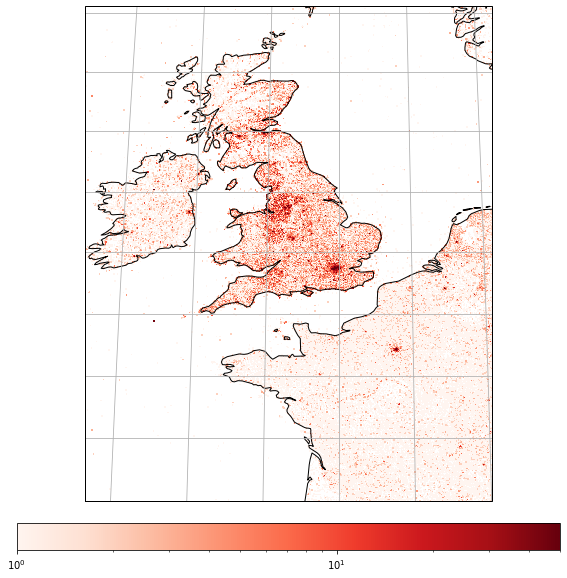

In [16]:
list_colors = ["r", "b", "g", "c", "m"]
map_extent = [-10, 6, 44, 60]

myfig, myaxes = plt.subplots(figsize=(20, 10))

# Projection
ax = plt.axes(projection=ccrs.Robinson(0))
"""
# Other examples for Projection
ax = plt.axes(projection=ccrs.Robinson(0))
ax = plt.axes(projection=ccrs.EuroPP())
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=0.0, 
                                                  central_latitude=50.0, 
                                                  satellite_height=500000))
"""

igrp = 0
myimage = ax.hist2d(np.array(lons2plot_all_gazetteer[igrp]), 
                    np.array(lats2plot_all_gazetteer[igrp]),
                    bins=(180*100, 90*100),
                    range=[[-180, 180], [-90, 90]],
                    cmap="Reds",
                    vmin=1,
                    vmax=50,
                    norm=LogNorm(),
                    transform=ccrs.PlateCarree()
                   )

ax.set_global()
ax.set_extent(map_extent)
ax.gridlines()
ax.coastlines(resolution='50m', linewidth=1.0)
myfig.colorbar(myimage[3], orientation='horizontal', fraction=0.05, pad=0.04)

plt.grid()
plt.savefig("wikipedia_UK_Europe.png", format="png", dpi=900)
#plt.show()

## Figure: GB1900, UK/Europe

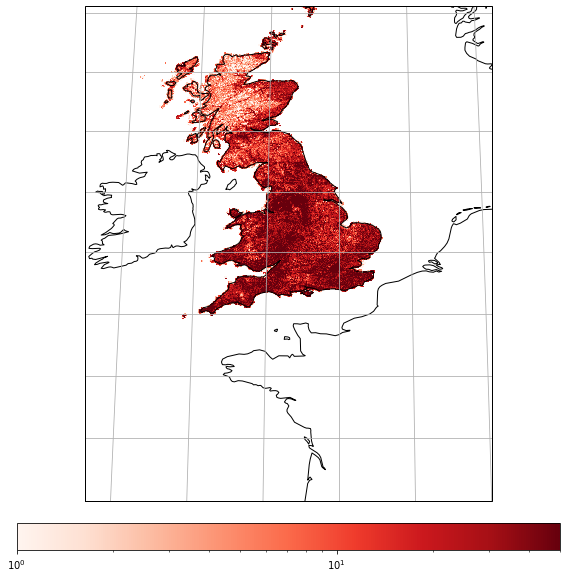

In [17]:
list_colors = ["r", "b", "g", "c", "m"]
map_extent = [-10, 6, 44, 60]

myfig, myaxes = plt.subplots(figsize=(20, 10))

# Projection
ax = plt.axes(projection=ccrs.Robinson(0))
"""
# Other examples for Projection
ax = plt.axes(projection=ccrs.Robinson(0))
ax = plt.axes(projection=ccrs.EuroPP())
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=0.0, 
                                                  central_latitude=50.0, 
                                                  satellite_height=500000))
"""

igrp = 0
myimage = ax.hist2d(np.array(lons2plot_gb1900[igrp]), 
                    np.array(lats2plot_gb1900[igrp]),
                    bins=(180*100, 90*100),
                    range=[[-180, 180], [-90, 90]],
                    cmap="Reds",
                    vmin=1,
                    vmax=50,
                    norm=LogNorm(),
                    transform=ccrs.PlateCarree()
                   )

ax.set_global()
ax.set_extent(map_extent)
ax.gridlines()
ax.coastlines(resolution='50m', linewidth=1.0)
myfig.colorbar(myimage[3], orientation='horizontal', fraction=0.05, pad=0.04)

plt.grid()
plt.savefig("GB1900_UK_Europe.png", format="png", dpi=900)
#plt.show()

## Figure: Wikipedia, Blandford Forum

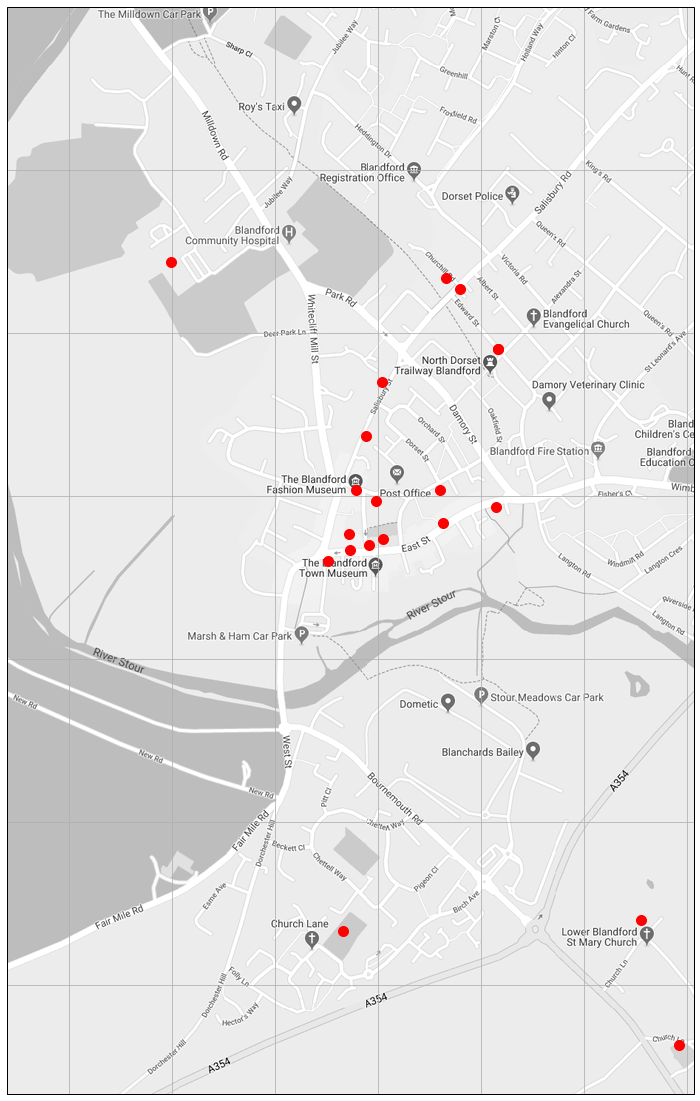

In [18]:
'''
# --- Other locations:
# Poole
dx = dy = 0.01
center_lon = -1.983333
center_lat = 50.716667
# Manchester
dx = dy = 0.01
center_lon = -2.245278
center_lat = 53.479444
# Ashton under Lyne
dx = dy = 0.01
center_lon = -2.095241
center_lat = 53.489708
# Blandford Forum
dx = dy = 0.01
center_lon = -2.1648
center_lat = 50.856
# Coventry
dx = dy = 0.01
center_lon = -1.510556
center_lat = 52.408056
'''
# Blandford Forum
dx = dy = 0.01
center_lon = -2.1648
center_lat = 50.856
map_extent = [center_lon - dx, center_lon + dx, center_lat - dy, center_lat + dy]
list_colors = ["r", "b", "g", "c", "m"]

request = cimgt.GoogleTiles(desired_tile_form='L', style='street')
#request = cimgt.GoogleTiles()
#request = cimgt.OSM()

fig, ax = plt.subplots(figsize=(20, 20))
ax = plt.axes(projection=request.crs)
ax.set_extent(map_extent)
ax.add_image(request, 16, interpolation='spline36', cmap='gray')

igrp = 0
ax.plot(np.array(lons2plot_brit_gazetteer[igrp]), 
        np.array(lats2plot_brit_gazetteer[igrp]),
        marker='o',
        ls=' ',
        color=list_colors[igrp],
        markersize=10,
        alpha=1.0,
        transform=ccrs.PlateCarree()
       )

ax.set_global()
ax.set_extent(map_extent)
ax.gridlines()
ax.coastlines(resolution='10m', linewidth=1.0)
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m')
ax.add_feature(land_10m, color='gray', zorder=0, edgecolor='black')

plt.grid()
plt.savefig("wikipedia_blandford.pdf", format="pdf")

## Figure: GB1900, Blandford Forum

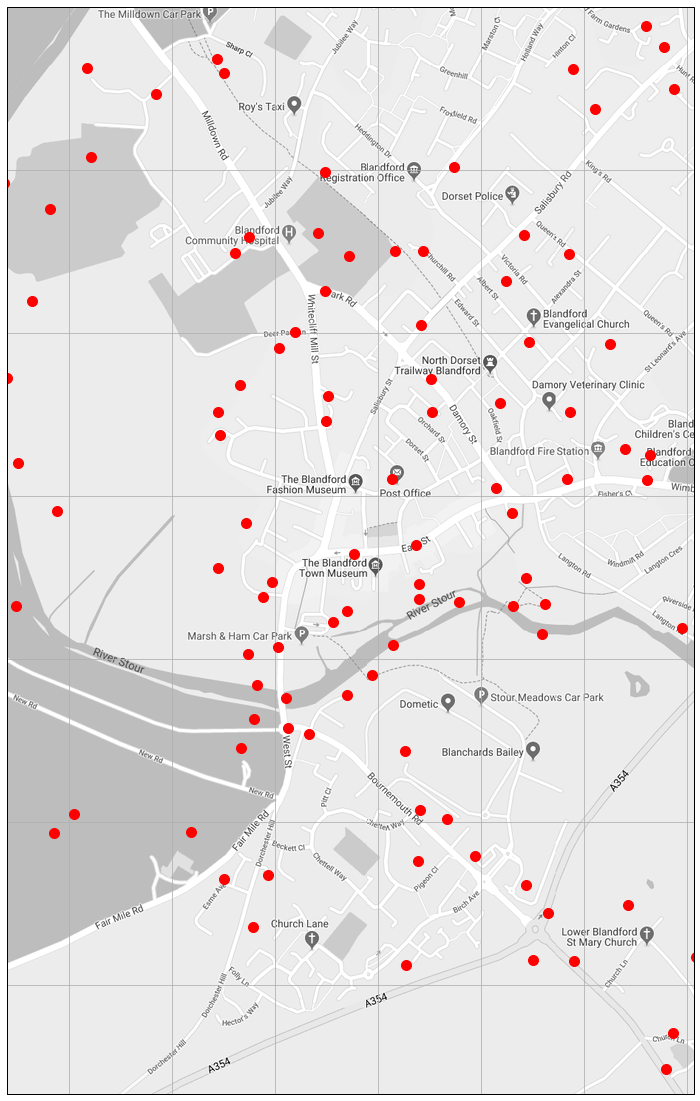

In [19]:
'''
# --- Other locations:
# Poole
dx = dy = 0.01
center_lon = -1.983333
center_lat = 50.716667
# Manchester
dx = dy = 0.01
center_lon = -2.245278
center_lat = 53.479444
# Ashton under Lyne
dx = dy = 0.01
center_lon = -2.095241
center_lat = 53.489708
# Blandford Forum
dx = dy = 0.01
center_lon = -2.1648
center_lat = 50.856
# Coventry
dx = dy = 0.01
center_lon = -1.510556
center_lat = 52.408056
'''
# Blandford Forum
dx = dy = 0.01
center_lon = -2.1648
center_lat = 50.856
map_extent = [center_lon - dx, center_lon + dx, center_lat - dy, center_lat + dy]
list_colors = ["r", "b", "g", "c", "m"]

request = cimgt.GoogleTiles(desired_tile_form='L', style='street')
#request = cimgt.GoogleTiles()
#request = cimgt.OSM()

fig, ax = plt.subplots(figsize=(20, 20))
ax = plt.axes(projection=request.crs)
ax.set_extent(map_extent)
ax.add_image(request, 16, interpolation='spline36', cmap='gray')

igrp = 0
ax.plot(np.array(lons2plot_gb1900[igrp]), 
        np.array(lats2plot_gb1900[igrp]),
        marker='o',
        ls=' ',
        color=list_colors[igrp],
        markersize=10,
        alpha=1.0,
        transform=ccrs.PlateCarree()
       )

ax.set_global()
ax.set_extent(map_extent)
ax.gridlines()
ax.coastlines(resolution='10m', linewidth=1.0)
land_10m = cartopy.feature.NaturalEarthFeature('physical', 'land', '10m')
ax.add_feature(land_10m, color='gray', zorder=0, edgecolor='black')

plt.grid()
plt.savefig("GB1900_blandford.pdf", format="pdf")

## =========== PLAYGROUND

In [ ]:
list_colors = ["r", "b", "g", "c", "m"]
map_extent = [-10, 25, 35, 60]

myfig, myaxes = plt.subplots(figsize=(20, 20))

# Projection
ax = plt.axes(projection=ccrs.Orthographic(0, 40))
"""
# Other examples for Projection
ax = plt.axes(projection=ccrs.Robinson(0))
ax = plt.axes(projection=ccrs.EuroPP())
ax = plt.axes(projection=ccrs.NearsidePerspective(central_longitude=0.0, 
                                                  central_latitude=50.0, 
                                                  satellite_height=500000))
"""

igrp = 0
ax.plot(np.array(lons2plot_all_gazetteer[igrp]), 
        np.array(lats2plot_all_gazetteer[igrp]),
        marker='o',
        ls=' ',
        color=list_colors[igrp],
        markersize=2,
        alpha=0.005,
        transform=ccrs.PlateCarree()
       )
ax.set_global()
ax.set_extent(map_extent)
ax.gridlines()
ax.coastlines(resolution='50m', linewidth=1.0)

plt.grid()
plt.show()

In [ ]:
## GeoPandas for plotting

import geopandas as gpd
from shapely.geometry import Point

# Download shapefiles from earthworks.stanford.edu
#world = gpd.read_file("./data_EPSG_4326/GBR_adm0.shp")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

list_colors = ["r", "b", "g", "c", "m"]

for igrp in range(len(lats2plot_all_gazetteer)):
    geometry = [Point(xy) for xy in zip(lons2plot_all_gazetteer[igrp], 
                                        lats2plot_all_gazetteer[igrp])]
    gdf = gpd.GeoDataFrame(geometry=geometry)
    gdf.plot(ax=world.plot(figsize=(20, 20), edgecolor='k', color='none'), 
             marker='o', 
             color=list_colors[igrp], 
             markersize=2,
             alpha=0.1
            )
    
    #plt.title(list_of_selected_text[igrp], size=24, weight='bold')
    plt.xlim(xmin=-10, xmax=15)
    plt.ylim(ymin=30, ymax=62)

    plt.legend(prop={'size': 32})
    plt.grid()
plt.show()

In [ ]:
list_colors = ["r", "b", "g", "c", "m"]
plt.figure(figsize=(20, 10))

igrp = 0
plt.hist2d(np.array(lons2plot_all_gazetteer[igrp]), 
           np.array(lats2plot_all_gazetteer[igrp]),
           bins=(720*2, 360*2),
           range=[[-180, 180], [-90, 90]],
           cmap="Reds",
           #label=list_of_selected_text[igrp],
           #cmin=1,
           cmax=1000,
           norm=LogNorm()
          )

#plt.title(list_of_selected_text[igrp], size=24, weight='bold')
#plt.xlim(xmin=-10, xmax=2)
#plt.ylim(ymin=49.5, ymax=62)
plt.legend(prop={'size': 32})
plt.colorbar(extend="both")
plt.grid()
plt.show()